In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uk-median-house-prices-and-salary-19752020/UK historical house prices and salary/Income_by_age_and_gender.csv
/kaggle/input/uk-median-house-prices-and-salary-19752020/UK historical house prices and salary/Average_UK_houseprices_and_salary.csv


In [2]:
df = pd.read_csv('/kaggle/input/uk-median-house-prices-and-salary-19752020/UK historical house prices and salary/Average_UK_houseprices_and_salary.csv')

In [3]:
df.head()

,Year,Average house price adj. by inflation (pounds),Median Salary adj. by inflation (pounds),Unnamed: 3
0,1975,94983,NaN,NaN
1,1976,89281,NaN,NaN
2,1977,85028,NaN,NaN
3,1978,100519,NaN,NaN
4,1979,112067,NaN,NaN


In [4]:
df.tail()

,Year,Average house price adj. by inflation (pounds),Median Salary adj. by inflation (pounds),Unnamed: 3
41,2016,237955,31420.16,NaN
42,2017,234936,30939.54,NaN
43,2018,230887,30772.44,NaN
44,2019,227812,30833.95,NaN
45,2020,239753,31487.00,NaN


In [5]:
df.isna().sum()

Year                                               0
Average house price adj. by inflation (pounds)     0
Median Salary adj. by inflation (pounds)          24
Unnamed: 3                                        46
dtype: int64

In [6]:
df.columns

Index(['Year', 'Average house price adj. by inflation (pounds)',
       'Median Salary adj. by inflation (pounds)', 'Unnamed: 3'],
      dtype='object')

In [7]:
df = df.loc[:, ['Year', 'Average house price adj. by inflation (pounds)',
       'Median Salary adj. by inflation (pounds)']]

In [8]:
df['Year']

0     1975
1     1976
2     1977
3     1978
4     1979
5     1980
6     1981
7     1982
8     1983
9     1984
10    1985
11    1986
12    1987
13    1988
14    1989
15    1990
16    1991
17    1992
18    1993
19    1994
20    1995
21    1996
22    1997
23    1998
24    1999
25    2000
26    2001
27    2002
28    2003
29    2004
30    2005
31    2006
32    2007
33    2008
34    2009
35    2010
36    2011
37    2012
38    2013
39    2014
40    2015
41    2016
42    2017
43    2018
44    2019
45    2020
Name: Year, dtype: int64

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.style.use('fivethirtyeight')
color_pal = sns.color_palette()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


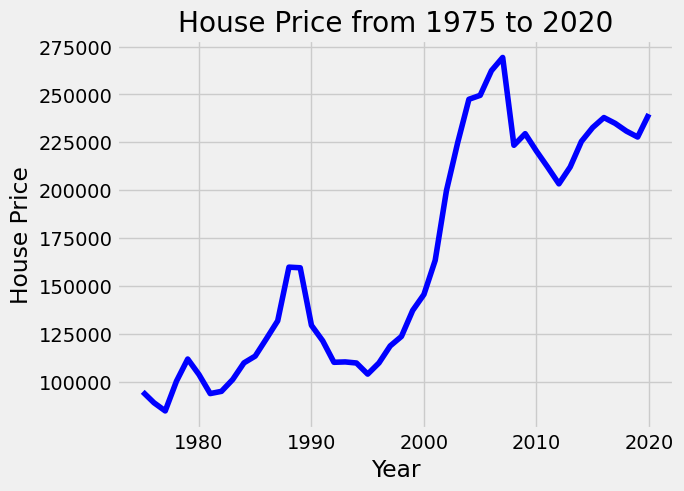

In [10]:
# Create list of years for which salary data is available
years = list(range(1975, 2021))

# Create figure and axis objects
fig, ax = plt.subplots()

# Plot salary data on first axis
ax.plot(years, df['Average house price adj. by inflation (pounds)'], color='blue')
ax.set_xlabel('Year')
ax.set_ylabel('House Price')

# Add title and legend
plt.title('House Price from 1975 to 2020')

# Show the plot
plt.show()

In [11]:
# Filter house price data to only include years from 1998 to 2020
filtered_df = df[(df['Year'] >= 1999) & (df['Year'] <= 2020)]
filtered_df = filtered_df.reset_index(drop=True)

# Calculate the year-on-year percent change of price and salary columns
filtered_df['price_yoy_pct_change'] = filtered_df['Average house price adj. by inflation (pounds)'].pct_change(periods=1, fill_method=None) * 100
filtered_df['salary_yoy_pct_change'] = filtered_df['Median Salary adj. by inflation (pounds)'].pct_change(periods=1, fill_method=None) * 100
filtered_df

,Year,Average house price adj. by inflation (pounds),Median Salary adj. by inflation (pounds),price_yoy_pct_change,salary_yoy_pct_change
0,1999,137401,31551.55,NaN,NaN
1,2000,145756,32443.92,6.080742,2.828292
2,2001,163517,33357.50,12.185433,2.815874
3,2002,199821,33898.44,22.201973,1.621644
4,2003,224849,34155.19,12.525210,0.757409
5,2004,247493,34630.76,10.070759,1.392380
6,2005,249549,34950.06,0.830731,0.922013
7,2006,262390,34576.58,5.145683,-1.068610
8,2007,269297,34114.51,2.632341,-1.336367
9,2008,223507,34337.23,-17.003531,0.652860


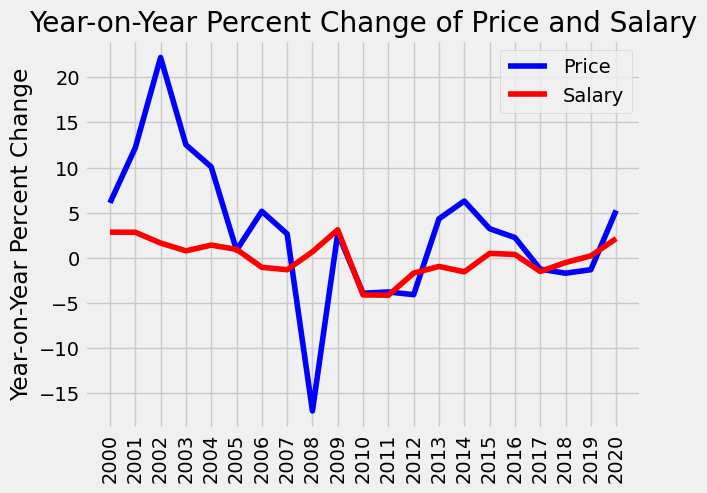

In [12]:


# Filter house price data to only include years from 1998 to 2020
filtered_df = df[(df['Year'] >= 1999) & (df['Year'] <= 2020)]
filtered_df = filtered_df.reset_index(drop=True)

# Calculate the year-on-year percent change of price and salary columns
filtered_df['price_yoy_pct_change'] = filtered_df['Average house price adj. by inflation (pounds)'].pct_change(periods=1, fill_method=None) * 100
filtered_df['salary_yoy_pct_change'] = filtered_df['Median Salary adj. by inflation (pounds)'].pct_change(periods=1, fill_method=None) * 100

# Create list of years for which salary data is available
years = list(range(2000, 2021))

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the year-on-year percentage change of price as a blue line
ax.plot(years, filtered_df['price_yoy_pct_change'][1:], color='blue', label='Price')

# Plot the year-on-year percentage change of salary as a red line
ax.plot(years, filtered_df['salary_yoy_pct_change'][1:], color='red', label='Salary')

# set x-axis tick labels
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=90)


# Set the y-axis label
ax.set_ylabel('Year-on-Year Percent Change')

# Set the chart title
ax.set_title('Year-on-Year Percent Change of Price and Salary')

# Add a legend
ax.legend()

# Show the chart
plt.show()

In [13]:
filtered_df = filtered_df.reset_index(drop=True)
price_to_salary = [filtered_df['Average house price adj. by inflation (pounds)'][i] / filtered_df['Median Salary adj. by inflation (pounds)'][i] for i in range(len(filtered_df['Average house price adj. by inflation (pounds)']))]
filtered_df['price_to_salary'] = price_to_salary


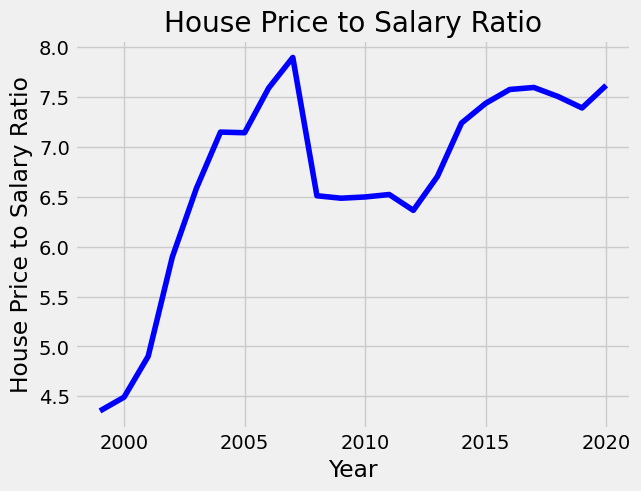

In [14]:

# Create list of years for which salary data is available
years = list(range(1999, 2021))

# Create figure and axis objects
fig, ax = plt.subplots()

# Plot salary data on first axis
ax.plot(years, price_to_salary, color='blue')
ax.set_xlabel('Year')
ax.set_ylabel('House Price to Salary Ratio')

# Add title and legend
plt.title('House Price to Salary Ratio')

# Show the plot
plt.show()
